Importing all the required Libraries 



In [1]:
from google.colab import drive

import numpy as np
import pandas as pd

import cv2
from os import listdir

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers


from keras.models import Model, load_model
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
from keras.applications import ResNet101, ResNet152,  ResNet50V2, ResNet101V2, ResNet152V2, DenseNet121, DenseNet169, DenseNet201, NASNetLarge, ResNet50

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Mounting google drive: As examinier you would also need to mount the drive in order to have no issues regarding this notebook. Otherwise you will need to amend the lines which imports the data from local machine. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Processing the annotated file created by annotation tool provided. This file contains **1000** annotations.

In [ ]:
## put here the full path of the generated file of the annotation tool, e.g.: /Users/jim/Desktop/AU_video.txt
file_name = '/content/drive/MyDrive/AU_video.txt'
with open(file_name) as fil:
 content = fil.readlines()

outputs = []

for elem in content:
 if 'N/A' in elem:
   continue
 else:
   line = elem.split(',')
   outputs.append([int(line[1]),int(line[3]),int(line[5]),int(line[7]),int(line[9]),int(line[11])])

np.shape(outputs)

# always the outputs correspond to (in that order): wrinkles, freakles, glasses, hair color, hair top, no face shown or not human

(1000, 6)

Now I will create main dataframe (df_all) and label dataframes for the models to process later:

In [ ]:
df_all = pd.DataFrame(outputs, columns = ['wrinkles','freakles','glasses','hair color','hair top','no face shown or not human'])
df_all

,wrinkles,freakles,glasses,hair color,hair top,no face shown or not human
0,0,0,0,1,2,0
1,0,0,0,1,2,0
2,0,0,0,1,2,0
3,1,0,0,5,1,0
4,1,0,2,6,2,0
...,...,...,...,...,...,...
995,0,1,0,3,2,0
996,0,0,0,0,2,0
997,0,0,0,3,2,0
998,0,1,0,3,2,0


The number of enteries in our main dataframe are:

In [ ]:
df_all.shape

(1000, 6)

Creating a list that contains file names in the same order which maps the annotations dataframes created just above. After that those file names are added to our main dataframe (df_all):

In [ ]:
#In order to maintain the mapping/order, I have manually entered the file names into the list file_list, the file names are given in images_names.txt in correct order
file_list = ['emotionet_4_first_50000_0f8670a1c22bf02a28d9548c1a4993cd.jpg',
'emotionet_4_first_50000_1-120630020F2.jpg',
'emotionet_4_first_50000_1.jpg',
'emotionet_4_first_50000_2e43e707fac0482c098feca47930f692.jpg',
'emotionet_4_first_50000_2E6138ED00000578-3314572-image-a-3_1447340125147.jpg',
'emotionet_4_first_50000_3-12-13-richard-martin1.jpg',
'emotionet_4_first_50000_3.JPG',
'emotionet_4_first_50000_03_BELEN_LOPEZ.jpg',
'emotionet_4_first_50000_3cdc62a220903c3df322a75b2a84fd98.jpg',
'emotionet_4_first_50000_3d5f18b5d8069f03b3440e619807e0c5f7d8013120f1dd4025b06ffcccb664ff.jpg',
'emotionet_4_first_50000_03PLAYLIST2-articleInline-v2.jpg',
'emotionet_4_first_50000_4a0fc4b6db1db7429958a1b6a6f3ba0f.jpg',
'emotionet_4_first_50000_4b999710b131bed2416de8892a4394ae.jpg',
'emotionet_4_first_50000_05-Beauty-Secrets-from-Around-the-World-Facial.jpg',
'emotionet_4_first_50000_06-joe-jonas.w245.h368.2x.jpg',
'emotionet_4_first_50000_6a00e54f80f3e28834017ee5a32b62970d-800wi',
'emotionet_4_first_50000_7b8ec9cnbn847-Top-10-haircut-styles-of-2015-For-men-2.jpg',
'emotionet_4_first_50000_7f94e7f3ccd7d1404c99e75964d84318.jpg',
'emotionet_4_first_50000_8.jpg',
'emotionet_4_first_50000_08a7a5e7c32b50fa926a13a7db56d39a_s=200&d=http%3A%2F%2Fs1.wp.com%2Fi%2Flogo%2Fwhite-gray-80.png&r=PG',
'emotionet_4_first_50000_08b2fdab9ec07efdffa145d3c4db6de01299079616_full.jpg',
'emotionet_4_first_50000_9d3b4bd048de71a237d35f4762f06461.jpg',
'emotionet_4_first_50000_9f6d22dec5a20bcdd01cd84e98637764_XL.jpg',
'emotionet_4_first_50000_13.jpg',
'emotionet_4_first_50000_15-bengali-beauty-01.jpg',
'emotionet_4_first_50000_15-short-platinum-blonde-bob.jpg_w=500',
'emotionet_4_first_50000_19-zayn-malik.w529.h529.2x.jpg',
'emotionet_4_first_50000_24-amy-poehler.w529.h793.2x.jpg',
'emotionet_4_first_50000_25-britney-spears-haircut.w245.h368.2x.jpg',
'emotionet_4_first_50000_025DW.jpg',
'emotionet_4_first_50000_032.JPG',
'emotionet_4_first_50000_40+pound+pic.JPG',
'emotionet_4_first_50000_100_3326.JPG',
'emotionet_4_first_50000_220px-Altiyan_Childs.jpg',
'emotionet_4_first_50000_220px-Olivia_Ruiz_2013.jpg',
'emotionet_4_first_50000_220px-Shelly_Martinez_2011.jpg',
'emotionet_4_first_50000_233_cb=20150717100432',
'emotionet_4_first_50000_350px-Benjamin_Netanyahu_portrait.jpg',
'emotionet_4_first_50000_360_jackie_chan_0413.jpg',
'emotionet_4_first_50000_0513_victoria_principal_launch_audio-1.jpg',
'emotionet_4_first_50000_530ba52cc3951.preview-620.jpg',
'emotionet_4_first_50000_777KKK.jpg',
'emotionet_4_first_50000_2007_bee_movie_wallpaper_003.jpg',
'emotionet_4_first_50000_2011-12-18-thomas-edison.jpg',
'emotionet_4_first_50000_2011-Spring-New-York-Fashion-Week-6-Days-Down-2-Go.jpg',
'emotionet_4_first_50000_2015-02-07-foreverteaserabc400.jpg',
'emotionet_4_first_50000_2015-12-24-1450993588-1755144-poster1-thumb.jpg',
'emotionet_4_first_50000_2248f5e29d15373e22ae016f0d6f70a7.jpg',
'emotionet_4_first_50000_2289c3b8e708882f9f9ed00d2b336f0a.jpg',
'emotionet_4_first_50000_6822.jpg',
'emotionet_4_first_50000_6903.JPG',
'emotionet_4_first_50000_6908.jpg',
'emotionet_4_first_50000_6910.jpg',
'emotionet_4_first_50000_6917.jpg',
'emotionet_4_first_50000_6919.jpg',
'emotionet_4_first_50000_6962.jpg',
'emotionet_4_first_50000_7040.jpg',
'emotionet_4_first_50000_7047.jpg',
'emotionet_4_first_50000_7051.jpg',
'emotionet_4_first_50000_7056.jpg',
'emotionet_4_first_50000_7091.jpg',
'emotionet_4_first_50000_7107.jpg',
'emotionet_4_first_50000_7172.jpg',
'emotionet_4_first_50000_7208.jpg',
'emotionet_4_first_50000_7210.jpg',
'emotionet_4_first_50000_7217.jpg',
'emotionet_4_first_50000_7219.jpg',
'emotionet_4_first_50000_7262.jpg',
'emotionet_4_first_50000_7265.jpg',
'emotionet_4_first_50000_7273.jpg',
'emotionet_4_first_50000_7274.jpg',
'emotionet_4_first_50000_7322.jpg',
'emotionet_4_first_50000_7334.jpg',
'emotionet_4_first_50000_7341.jpg',
'emotionet_4_first_50000_7346.jpg',
'emotionet_4_first_50000_7348.jpg',
'emotionet_4_first_50000_7350.jpg',
'emotionet_4_first_50000_7357.jpg',
'emotionet_4_first_50000_7359.jpg',
'emotionet_4_first_50000_7381.jpg',
'emotionet_4_first_50000_7388.jpg',
'emotionet_4_first_50000_7390.jpg',
'emotionet_4_first_50000_7397.jpg',
'emotionet_4_first_50000_7399.jpg',
'emotionet_4_first_50000_7421.jpg',
'emotionet_4_first_50000_7437.jpg',
'emotionet_4_first_50000_7439.jpg',
'emotionet_4_first_50000_7440.JPG',
'emotionet_4_first_50000_7442.jpg',
'emotionet_4_first_50000_7453.jpg',
'emotionet_4_first_50000_7482.jpg',
'emotionet_4_first_50000_7485.jpg',
'emotionet_4_first_50000_7493.jpg',
'emotionet_4_first_50000_7566.jpg',
'emotionet_4_first_50000_7579.jpg',
'emotionet_4_first_50000_7603.jpg',
'emotionet_4_first_50000_7604.jpg',
'emotionet_4_first_50000_7608.JPG',
'emotionet_4_first_50000_7612.jpg',
'emotionet_4_first_50000_7615.jpg',
'emotionet_4_first_50000_7660.jpg',
'emotionet_4_first_50000_7669.jpg',
'emotionet_4_first_50000_7676.jpg',
'emotionet_4_first_50000_7720.jpg',
'emotionet_4_first_50000_7743.jpg',
'emotionet_4_first_50000_7784.jpg',
'emotionet_4_first_50000_7792.jpg',
'emotionet_4_first_50000_7821.jpg',
'emotionet_4_first_50000_7828.jpg',
'emotionet_4_first_50000_7839.jpg',
'emotionet_4_first_50000_7842.jpg',
'emotionet_4_first_50000_7845.jpg',
'emotionet_4_first_50000_7854.jpg',
'emotionet_4_first_50000_7882.jpg',
'emotionet_4_first_50000_7894.jpg',
'emotionet_4_first_50000_7914.jpg',
'emotionet_4_first_50000_7961.jpg',
'emotionet_4_first_50000_7966.jpg',
'emotionet_4_first_50000_7968.jpg',
'emotionet_4_first_50000_7970.jpg',
'emotionet_4_first_50000_8009.jpg',
'emotionet_4_first_50000_8016.jpg',
'emotionet_4_first_50000_8151.jpg',
'emotionet_4_first_50000_8180.jpg',
'emotionet_4_first_50000_8198.jpg',
'emotionet_4_first_50000_8233.jpg',
'emotionet_4_first_50000_8246.jpg',
'emotionet_4_first_50000_8257.jpg',
'emotionet_4_first_50000_8286.jpg',
'emotionet_4_first_50000_8299.jpg',
'emotionet_4_first_50000_8301.jpg',
'emotionet_4_first_50000_8306.jpg',
'emotionet_4_first_50000_8362.jpg',
'emotionet_4_first_50000_8468.jpg',
'emotionet_4_first_50000_8470.jpg',
'emotionet_4_first_50000_8521.jpg',
'emotionet_4_first_50000_8526.jpg',
'emotionet_4_first_50000_8539.jpg',
'emotionet_4_first_50000_8542.jpg',
'emotionet_4_first_50000_8564.jpeg',
'emotionet_4_first_50000_8582.jpg',
'emotionet_4_first_50000_8593.jpg',
'emotionet_4_first_50000_8594.jpg',
'emotionet_4_first_50000_8631.jpg',
'emotionet_4_first_50000_8636.jpg',
'emotionet_4_first_50000_8638.jpg',
'emotionet_4_first_50000_8683.jpg',
'emotionet_4_first_50000_8684.jpg',
'emotionet_4_first_50000_8735f0f6867196efa584b6a4eb2376c6.jpg',
'emotionet_4_first_50000_8760.jpg',
'emotionet_4_first_50000_8776.jpg',
'emotionet_4_first_50000_8802.jpg',
'emotionet_4_first_50000_8813.jpg',
'emotionet_4_first_50000_8814.jpg',
'emotionet_4_first_50000_8837.jpeg',
'emotionet_4_first_50000_8877.jpg',
'emotionet_4_first_50000_8937.jpg',
'emotionet_4_first_50000_8942.jpg',
'emotionet_4_first_50000_8953.jpg',
'emotionet_4_first_50000_8954.jpg',
'emotionet_4_first_50000_9004.jpg',
'emotionet_4_first_50000_9067.jpg',
'emotionet_4_first_50000_9069.jpg',
'emotionet_4_first_50000_9078.jpg',
'emotionet_4_first_50000_9120.jpg',
'emotionet_4_first_50000_9131.jpg',
'emotionet_4_first_50000_9133.JPG',
'emotionet_4_first_50000_9136.jpg',
'emotionet_4_first_50000_9143.jpg',
'emotionet_4_first_50000_9152.jpg',
'emotionet_4_first_50000_9192.jpg',
'emotionet_4_first_50000_9226.jpg',
'emotionet_4_first_50000_9230.jpg',
'emotionet_4_first_50000_9239.jpg',
'emotionet_4_first_50000_9245.jpg',
'emotionet_4_first_50000_9254.jpg',
'emotionet_4_first_50000_9294.jpg',
'emotionet_4_first_50000_9302.jpg',
'emotionet_4_first_50000_9305.jpg',
'emotionet_4_first_50000_9366.jpg',
'emotionet_4_first_50000_9370.jpg',
'emotionet_4_first_50000_9379.jpg',
'emotionet_4_first_50000_9406.jpg',
'emotionet_4_first_50000_9408.jpg',
'emotionet_4_first_50000_9410.jpg',
'emotionet_4_first_50000_9417.jpg',
'emotionet_4_first_50000_9419.jpg',
'emotionet_4_first_50000_9462.jpg',
'emotionet_4_first_50000_9465.jpg',
'emotionet_4_first_50000_9522.jpg',
'emotionet_4_first_50000_9525.jpg',
'emotionet_4_first_50000_9546.jpg',
'emotionet_4_first_50000_9550.jpg',
'emotionet_4_first_50000_9557.jpg',
'emotionet_4_first_50000_9586.jpg',
'emotionet_4_first_50000_9590.jpg',
'emotionet_4_first_50000_9597.jpg',
'emotionet_4_first_50000_9624.jpg',
'emotionet_4_first_50000_9635.jpg',
'emotionet_4_first_50000_9656.jpg',
'emotionet_4_first_50000_9658.jpg',
'emotionet_4_first_50000_9709.jpg',
'emotionet_4_first_50000_9711.jpg',
'emotionet_4_first_50000_9718.jpg',
'emotionet_4_first_50000_9801.jpg',
'emotionet_4_first_50000_9817.jpg',
'emotionet_4_first_50000_9874.jpg',
'emotionet_4_first_50000_9922.jpg',
'emotionet_4_first_50000_9925.jpg',
'emotionet_4_first_50000_9934.jpg',
'emotionet_4_first_50000_9948.jpg',
'emotionet_4_first_50000_9957.jpg',
'emotionet_4_first_50000_9988.jpg',
'emotionet_4_first_50000_9990.jpg',
'emotionet_4_first_50000_10024.jpg',
'emotionet_4_first_50000_10032.jpg',
'emotionet_4_first_50000_10035.jpg',
'emotionet_4_first_50000_10049.jpg',
'emotionet_4_first_50000_10056.jpg',
'emotionet_4_first_50000_10058.jpg',
'emotionet_4_first_50000_10087.jpg',
'emotionet_4_first_50000_10100.jpg',
'emotionet_4_first_50000_10118.jpg',
'emotionet_4_first_50000_10172.jpg',
'emotionet_4_first_50000_10175.jpg',
'emotionet_4_first_50000_10201.jpg',
'emotionet_4_first_50000_10206.jpg',
'emotionet_4_first_50000_10217.jpg',
'emotionet_4_first_50000_10219.jpg',
'emotionet_4_first_50000_10262.jpg',
'emotionet_4_first_50000_10265.jpg',
'emotionet_4_first_50000_10325.jpg',
'emotionet_4_first_50000_10329.JPG',
'emotionet_4_first_50000_10341.jpg',
'emotionet_4_first_50000_10348.jpg',
'emotionet_4_first_50000_10350.jpg',
'emotionet_4_first_50000_10357.jpg',
'emotionet_4_first_50000_10359.jpg',
'emotionet_4_first_50000_10386.jpg',
'emotionet_4_first_50000_10428.jpg',
'emotionet_4_first_50000_10482.jpg',
'emotionet_4_first_50000_10502.jpg',
'emotionet_4_first_50000_10507.JPG',
'emotionet_4_first_50000_10513.jpg',
'emotionet_4_first_50000_10514.jpg',
'emotionet_4_first_50000_10561.jpg',
'emotionet_4_first_50000_10566.jpg',
'emotionet_4_first_50000_10570.jpg',
'emotionet_4_first_50000_10579.jpg',
'emotionet_4_first_50000_10615.jpg',
'emotionet_4_first_50000_10676.jpg',
'emotionet_4_first_50000_10720.jpg',
'emotionet_4_first_50000_10729.jpg',
'emotionet_4_first_50000_10731.jpg',
'emotionet_4_first_50000_10738.jpg',
'emotionet_4_first_50000_10743.jpg',
'emotionet_4_first_50000_10744.jpg',
'emotionet_4_first_50000_10752.jpg',
'emotionet_4_first_50000_10755.jpg',
'emotionet_4_first_50000_10783.jpg',
'emotionet_4_first_50000_10784.jpg',
'emotionet_4_first_50000_10792.jpg',
'emotionet_4_first_50000_10821.jpg',
'emotionet_4_first_50000_10826.jpg',
'emotionet_4_first_50000_10828.jpg',
'emotionet_4_first_50000_10882.jpg',
'emotionet_4_first_50000_10894.jpg',
'emotionet_4_first_50000_10902.jpg',
'emotionet_4_first_50000_10905.jpg',
'emotionet_4_first_50000_10913.jpg',
'emotionet_4_first_50000_10914.jpg',
'emotionet_4_first_50000_10966.jpg',
'emotionet_4_first_50000_10968.jpg',
'emotionet_4_first_50000_10970.jpg',
'emotionet_4_first_50000_10979.jpg',
'emotionet_4_first_50000_11020.jpg',
'emotionet_4_first_50000_11095.jpg',
'emotionet_4_first_50000_11103.jpeg',
'emotionet_4_first_50000_11112.jpg',
'emotionet_4_first_50000_11115.jpg',
'emotionet_4_first_50000_11148.jpeg',
'emotionet_4_first_50000_11178.jpg',
'emotionet_4_first_50000_11200.JPG',
'emotionet_4_first_50000_11213.jpg',
'emotionet_4_first_50000_11266.jpg',
'emotionet_4_first_50000_11268.jpg',
'emotionet_4_first_50000_11279.jpg',
'emotionet_4_first_50000_11321.jpg',
'emotionet_4_first_50000_11337.jpg',
'emotionet_4_first_50000_11339.jpg',
'emotionet_4_first_50000_11354.jpg',
'emotionet_4_first_50000_11382.jpg',
'emotionet_4_first_50000_11441.jpg',
'emotionet_4_first_50000_11446.jpg',
'emotionet_4_first_50000_11448.jpg',
'emotionet_4_first_50000_11459.jpg',
'emotionet_4_first_50000_11481.jpg',
'emotionet_4_first_50000_11486.jpg',
'emotionet_4_first_50000_11510.jpg',
'emotionet_4_first_50000_11515.JPG',
'emotionet_4_first_50000_11517.jpg',
'emotionet_4_first_50000_11519.jpg',
'emotionet_4_first_50000_11574.jpg',
'emotionet_4_first_50000_11663.jpg',
'emotionet_4_first_50000_11672.jpg',
'emotionet_4_first_50000_11675.jpg',
'emotionet_4_first_50000_11723.jpg',
'emotionet_4_first_50000_11732.jpg',
'emotionet_4_first_50000_11735.jpg',
'emotionet_4_first_50000_11740.jpg',
'emotionet_4_first_50000_11789.jpg',
'emotionet_4_first_50000_11791.jpg',
'emotionet_4_first_50000_11822.jpg',
'emotionet_4_first_50000_11825.jpg',
'emotionet_4_first_50000_11846.jpg',
'emotionet_4_first_50000_11848.jpg',
'emotionet_4_first_50000_11850.jpg',
'emotionet_4_first_50000_11857.jpg',
'emotionet_4_first_50000_11859.jpg',
'emotionet_4_first_50000_11883.JPG',
'emotionet_4_first_50000_11897.jpg',
'emotionet_4_first_50000_11901.jpg',
'emotionet_4_first_50000_11962.jpg',
'emotionet_4_first_50000_12016.jpg',
'emotionet_4_first_50000_12064.jpg',
'emotionet_4_first_50000_12075.jpg',
'emotionet_4_first_50000_12123.jpg',
'emotionet_4_first_50000_12124.jpg',
'emotionet_4_first_50000_12132.jpg',
'emotionet_4_first_50000_12135.jpg',
'emotionet_4_first_50000_12140.jpg',
'emotionet_4_first_50000_12151.jpg',
'emotionet_4_first_50000_12156.jpg',
'emotionet_4_first_50000_12222.jpg',
'emotionet_4_first_50000_12225.jpg',
'emotionet_4_first_50000_12257.jpg',
'emotionet_4_first_50000_12286.jpg',
'emotionet_4_first_50000_12288.jpg',
'emotionet_4_first_50000_12290.jpg',
'emotionet_4_first_50000_12310.jpg',
'emotionet_4_first_50000_12373.jpg',
'emotionet_4_first_50000_12461.jpg',
'emotionet_4_first_50000_12468.jpg',
'emotionet_4_first_50000_12537.jpg',
'emotionet_4_first_50000_12553.jpg',
'emotionet_4_first_50000_12582.jpg',
'emotionet_4_first_50000_12594.jpg',
'emotionet_4_first_50000_12636.jpg',
'emotionet_4_first_50000_12652.jpg',
'emotionet_4_first_50000_12692.jpg',
'emotionet_4_first_50000_12703.jpg',
'emotionet_4_first_50000_12712.jpg',
'emotionet_4_first_50000_12715.jpg',
'emotionet_4_first_50000_12760.jpg',
'emotionet_4_first_50000_12767.jpg',
'emotionet_4_first_50000_12802.jpg',
'emotionet_4_first_50000_12805.jpg',
'emotionet_4_first_50000_12879.jpg',
'emotionet_4_first_50000_12921.jpg',
'emotionet_4_first_50000_12928.jpg',
'emotionet_4_first_50000_12930.jpg',
'emotionet_4_first_50000_12937.jpg',
'emotionet_4_first_50000_12942.jpg',
'emotionet_4_first_50000_12945.jpg',
'emotionet_4_first_50000_12953.jpg',
'emotionet_4_first_50000_12982.jpg',
'emotionet_4_first_50000_12993.jpg',
'emotionet_4_first_50000_12994.jpg',
'emotionet_4_first_50000_13003.jpg',
'emotionet_4_first_50000_13004.jpg',
'emotionet_4_first_50000_13015.jpg',
'emotionet_4_first_50000_13067.jpg',
'emotionet_4_first_50000_13120.jpg',
'emotionet_4_first_50000_13131.jpg',
'emotionet_4_first_50000_13136.jpg',
'emotionet_4_first_50000_13152.jpg',
'emotionet_4_first_50000_13155.jpg',
'emotionet_4_first_50000_13183.jpg',
'emotionet_4_first_50000_13226.jpg',
'emotionet_4_first_50000_13242.jpg',
'emotionet_4_first_50000_13245.jpg',
'emotionet_4_first_50000_13285.jpg',
'emotionet_4_first_50000_13294.jpg',
'emotionet_4_first_50000_13305.jpg',
'emotionet_4_first_50000_13313.jpg',
'emotionet_4_first_50000_13368.jpg',
'emotionet_4_first_50000_13377.jpg',
'emotionet_4_first_50000_13379.jpg',
'emotionet_4_first_50000_13419.jpg',
'emotionet_4_first_50000_13541.jpg',
'emotionet_4_first_50000_13557.jpg',
'emotionet_4_first_50000_13586.jpg',
'emotionet_4_first_50000_13597.jpg',
'emotionet_4_first_50000_13635.jpg',
'emotionet_4_first_50000_13640.jpg',
'emotionet_4_first_50000_13696.jpg',
'emotionet_4_first_50000_13709.jpg',
'emotionet_4_first_50000_13711.jpg',
'emotionet_4_first_50000_13764.jpg',
'emotionet_4_first_50000_13772.jpg',
'emotionet_4_first_50000_13801.jpg',
'emotionet_4_first_50000_13803.JPG',
'emotionet_4_first_50000_13808.jpg',
'emotionet_4_first_50000_13810.jpg',
'emotionet_4_first_50000_13815.JPG',
'emotionet_4_first_50000_13817.jpg',
'emotionet_4_first_50000_13819.jpg',
'emotionet_4_first_50000_13865.jpg',
'emotionet_4_first_50000_13873.jpg',
'emotionet_4_first_50000_13874.jpg',
'emotionet_4_first_50000_13927.jpeg',
'emotionet_4_first_50000_13941.jpg',
'emotionet_4_first_50000_13981.jpg',
'emotionet_4_first_50000_13988.jpg',
'emotionet_4_first_50000_13990.jpg',
'emotionet_4_first_50000_13997.jpg',
'emotionet_4_first_50000_14073.jpg',
'emotionet_4_first_50000_14074.jpg',
'emotionet_4_first_50000_14125.jpg',
'emotionet_4_first_50000_14141.jpg',
'emotionet_4_first_50000_14148.jpg',
'emotionet_4_first_50000_14150.jpg',
'emotionet_4_first_50000_14157.jpg',
'emotionet_4_first_50000_14159.jpg',
'emotionet_4_first_50000_14181.jpg',
'emotionet_4_first_50000_14186.jpg',
'emotionet_4_first_50000_14188.jpg',
'emotionet_4_first_50000_14197.jpg',
'emotionet_4_first_50000_14199.jpg',
'emotionet_4_first_50000_14223.jpg',
'emotionet_4_first_50000_14240.jpg',
'emotionet_4_first_50000_14249.jpg',
'emotionet_4_first_50000_14251.jpg',
'emotionet_4_first_50000_14256.jpg',
'emotionet_4_first_50000_14287.jpg',
'emotionet_4_first_50000_14291.jpg',
'emotionet_4_first_50000_14311.jpg',
'emotionet_4_first_50000_14316.jpg',
'emotionet_4_first_50000_14415.jpg',
'emotionet_4_first_50000_14460.jpg',
'emotionet_4_first_50000_14469.jpg',
'emotionet_4_first_50000_14478.jpg',
'emotionet_4_first_50000_14531.jpg',
'emotionet_4_first_50000_14544.jpg',
'emotionet_4_first_50000_14584.jpg',
'emotionet_4_first_50000_14626.jpg',
'emotionet_4_first_50000_14630.jpg',
'emotionet_4_first_50000_14642.jpg',
'emotionet_4_first_50000_14653.jpg',
'emotionet_4_first_50000_14682.jpg',
'emotionet_4_first_50000_14705.jpg',
'emotionet_4_first_50000_14713.jpg',
'emotionet_4_first_50000_14714.jpg',
'emotionet_4_first_50000_14766.jpg',
'emotionet_4_first_50000_14768.jpg',
'emotionet_4_first_50000_14777.jpg',
'emotionet_4_first_50000_14779.jpg',
'emotionet_4_first_50000_14803.jpg',
'emotionet_4_first_50000_14812.jpg',
'emotionet_4_first_50000_14874.JPG',
'emotionet_4_first_50000_14876.jpg',
'emotionet_4_first_50000_14938.jpg',
'emotionet_4_first_50000_14952.jpg',
'emotionet_4_first_50000_14955.jpg',
'emotionet_4_first_50000_14983.jpg',
'emotionet_4_first_50000_14984.jpg',
'emotionet_4_first_50000_14992.jpg',
'emotionet_4_first_50000_14995.jpg',
'emotionet_4_first_50000_15002.jpg',
'emotionet_4_first_50000_15061.jpg',
'emotionet_4_first_50000_15066.jpg',
'emotionet_4_first_50000_15070.jpg',
'emotionet_4_first_50000_15077.jpg',
'emotionet_4_first_50000_15128.jpg',
'emotionet_4_first_50000_15130.jpg',
'emotionet_4_first_50000_15137.jpg',
'emotionet_4_first_50000_15139.jpg',
'emotionet_4_first_50000_15142.jpg',
'emotionet_4_first_50000_15145.jpg',
'emotionet_4_first_50000_15153.jpg',
'emotionet_4_first_50000_15193.jpg',
'emotionet_4_first_50000_15194.jpg',
'emotionet_4_first_50000_15215.jpeg',
'emotionet_4_first_50000_15227.jpg',
'emotionet_4_first_50000_15229.jpg',
'emotionet_4_first_50000_15255.jpg',
'emotionet_4_first_50000_15283.jpg',
'emotionet_4_first_50000_15284.jpg',
'emotionet_4_first_50000_15304.jpg',
'emotionet_4_first_50000_15315.jpg',
'emotionet_4_first_50000_15360.jpg',
'emotionet_4_first_50000_15369.jpg',
'emotionet_4_first_50000_15378.jpg',
'emotionet_4_first_50000_15394.jpeg',
'emotionet_4_first_50000_15411.jpg',
'emotionet_4_first_50000_15416.jpg',
'emotionet_4_first_50000_15523.jpg',
'emotionet_4_first_50000_15524.jpg',
'emotionet_4_first_50000_15535.jpg',
'emotionet_4_first_50000_15556.jpg',
'emotionet_4_first_50000_15558.jpg',
'emotionet_4_first_50000_15589.jpg',
'emotionet_4_first_50000_15598.jpg',
'emotionet_4_first_50000_15633.jpg',
'emotionet_4_first_50000_15659.jpg',
'emotionet_4_first_50000_15688.jpg',
'emotionet_4_first_50000_15701.jpg',
'emotionet_4_first_50000_15765.jpg',
'emotionet_4_first_50000_15800.jpg',
'emotionet_4_first_50000_15818.jpg',
'emotionet_4_first_50000_15923.jpg',
'emotionet_4_first_50000_15924.jpg',
'emotionet_4_first_50000_15935.jpg',
'emotionet_4_first_50000_15940.jpg',
'emotionet_4_first_50000_15949.jpg',
'emotionet_4_first_50000_15951.jpg',
'emotionet_4_first_50000_15980.jpg',
'emotionet_4_first_50000_15987.jpg',
'emotionet_4_first_50000_15991.jpg',
'emotionet_4_first_50000_16006.jpeg',
'emotionet_4_first_50000_16022.jpg',
'emotionet_4_first_50000_16046.jpg',
'emotionet_4_first_50000_16048.jpg',
'emotionet_4_first_50000_16057.jpg',
'emotionet_4_first_50000_16081.jpg',
'emotionet_4_first_50000_16090.jpg',
'emotionet_4_first_50000_16095.JPG',
'emotionet_4_first_50000_16100.jpeg',
'emotionet_4_first_50000_16108.jpg',
'emotionet_4_first_50000_16117.jpg',
'emotionet_4_first_50000_16119.jpg',
'emotionet_4_first_50000_16200.jpg',
'emotionet_4_first_50000_16264.jpg',
'emotionet_4_first_50000_16324.jpg',
'emotionet_4_first_50000_16335.jpg',
'emotionet_4_first_50000_16340.jpg',
'emotionet_4_first_50000_16380.jpg',
'emotionet_4_first_50000_16396.jpg',
'emotionet_4_first_50000_16398.jpg',
'emotionet_4_first_50000_16452.jpg',
'emotionet_4_first_50000_16492.jpg',
'emotionet_4_first_50000_16495.jpg',
'emotionet_4_first_50000_16503.jpg',
'emotionet_4_first_50000_16504.jpg',
'emotionet_4_first_50000_16512.jpg',
'emotionet_4_first_50000_16515.jpg',
'emotionet_4_first_50000_16567.jpg',
'emotionet_4_first_50000_16576.jpg',
'emotionet_4_first_50000_16578.jpg',
'emotionet_4_first_50000_16661.jpg',
'emotionet_4_first_50000_16679.jpg',
'emotionet_4_first_50000_16721.jpg',
'emotionet_4_first_50000_16726.jpg',
'emotionet_4_first_50000_16739.jpg',
'emotionet_4_first_50000_16745.jpg',
'emotionet_4_first_50000_16785.jpg',
'emotionet_4_first_50000_16789.JPG',
'emotionet_4_first_50000_16820.jpg',
'emotionet_4_first_50000_16829.jpg',
'emotionet_4_first_50000_16831.jpg',
'emotionet_4_first_50000_16836.jpg',
'emotionet_4_first_50000_16838.jpg',
'emotionet_4_first_50000_16852.jpg',
'emotionet_4_first_50000_16892.jpg',
'emotionet_4_first_50000_16915.jpg',
'emotionet_4_first_50000_16967.jpg',
'emotionet_4_first_50000_17021.jpg',
'emotionet_4_first_50000_17039.jpg',
'emotionet_4_first_50000_17093.jpg',
'emotionet_4_first_50000_17094.jpg',
'emotionet_4_first_50000_17161.jpg',
'emotionet_4_first_50000_17203.jpg',
'emotionet_4_first_50000_17204.jpg',
'emotionet_4_first_50000_17212.jpg',
'emotionet_4_first_50000_17269.jpg',
'emotionet_4_first_50000_17271.jpg',
'emotionet_4_first_50000_17276.jpg',
'emotionet_4_first_50000_17352.jpg',
'emotionet_4_first_50000_17384.jpg',
'emotionet_4_first_50000_17392.jpg',
'emotionet_4_first_50000_17440.jpg',
'emotionet_4_first_50000_17449.jpg',
'emotionet_4_first_50000_17451.jpg',
'emotionet_4_first_50000_17458.jpg',
'emotionet_4_first_50000_17480.jpg',
'emotionet_4_first_50000_17491.jpg',
'emotionet_4_first_50000_17498.jpg',
'emotionet_4_first_50000_17507.jpg',
'emotionet_4_first_50000_17511.jpg',
'emotionet_4_first_50000_17516.jpg',
'emotionet_4_first_50000_17572.jpg',
'emotionet_4_first_50000_17608.jpg',
'emotionet_4_first_50000_17615.JPG',
'emotionet_4_first_50000_17662.jpg',
'emotionet_4_first_50000_17725.jpg',
'emotionet_4_first_50000_17734.jpg',
'emotionet_4_first_50000_17748.jpg',
'emotionet_4_first_50000_17757.jpg',
'emotionet_4_first_50000_17786.jpg',
'emotionet_4_first_50000_17788.jpg',
'emotionet_4_first_50000_17797.jpg',
'emotionet_4_first_50000_17832.jpg',
'emotionet_4_first_50000_17840.jpg',
'emotionet_4_first_50000_17847.jpg',
'emotionet_4_first_50000_17851.jpg',
'emotionet_4_first_50000_17856.jpg',
'emotionet_4_first_50000_17858.jpg',
'emotionet_4_first_50000_17900.jpg',
'emotionet_4_first_50000_17909.jpg',
'emotionet_4_first_50000_17975.jpg',
'emotionet_4_first_50000_18002.jpg',
'emotionet_4_first_50000_18013.jpg',
'emotionet_4_first_50000_18014.jpg',
'emotionet_4_first_50000_18072.jpeg',
'emotionet_4_first_50000_18130.jpg',
'emotionet_4_first_50000_18139.jpg',
'emotionet_4_first_50000_18142.jpg',
'emotionet_4_first_50000_18182.jpg',
'emotionet_4_first_50000_18193.jpg',
'emotionet_4_first_50000_18220.jpg',
'emotionet_4_first_50000_18227.jpg',
'emotionet_4_first_50000_18229.jpg',
'emotionet_4_first_50000_18236.jpg',
'emotionet_4_first_50000_18244.jpg',
'emotionet_4_first_50000_18304.jpg',
'emotionet_4_first_50000_18371.jpg',
'emotionet_4_first_50000_18376.jpg',
'emotionet_4_first_50000_18464.jpg',
'emotionet_4_first_50000_18472.jpg',
'emotionet_4_first_50000_18475.jpg',
'emotionet_4_first_50000_18523.jpg',
'emotionet_4_first_50000_18532.jpg',
'emotionet_4_first_50000_18540.jpg',
'emotionet_4_first_50000_18547.jpg',
'emotionet_4_first_50000_18551.jpg',
'emotionet_4_first_50000_18580.jpg',
'emotionet_4_first_50000_18589.jpg',
'emotionet_4_first_50000_18591.jpg',
'emotionet_4_first_50000_18596.jpg',
'emotionet_4_first_50000_18625.jpg',
'emotionet_4_first_50000_18629.JPG',
'emotionet_4_first_50000_18646.jpg',
'emotionet_4_first_50000_18648.jpg',
'emotionet_4_first_50000_18657.jpg',
'emotionet_4_first_50000_18681.jpg',
'emotionet_4_first_50000_18683.JPG',
'emotionet_4_first_50000_18688.jpg',
'emotionet_4_first_50000_18690.jpg',
'emotionet_4_first_50000_18697.jpg',
'emotionet_4_first_50000_18699.jpg',
'emotionet_4_first_50000_18717.jpg',
'emotionet_4_first_50000_18800.jpg',
'emotionet_4_first_50000_18816.jpg',
'emotionet_4_first_50000_18872.jpg',
'emotionet_4_first_50000_18924.jpg',
'emotionet_4_first_50000_18932.jpg',
'emotionet_4_first_50000_18935.jpg',
'emotionet_4_first_50000_18949.jpg',
'emotionet_4_first_50000_18958.jpg',
'emotionet_4_first_50000_18980.jpg',
'emotionet_4_first_50000_18991.jpg',
'emotionet_4_first_50000_19001.jpg',
'emotionet_4_first_50000_19008.jpg',
'emotionet_4_first_50000_19017.jpg',
'emotionet_4_first_50000_19019.jpg',
'emotionet_4_first_50000_19065.jpg',
'emotionet_4_first_50000_19125.jpg',
'emotionet_4_first_50000_19134.jpg',
'emotionet_4_first_50000_19148.jpg',
'emotionet_4_first_50000_19159.jpg',
'emotionet_4_first_50000_19186.jpg',
'emotionet_4_first_50000_19188.jpg',
'emotionet_4_first_50000_19190.jpg',
'emotionet_4_first_50000_19199.jpg',
'emotionet_4_first_50000_19249.jpg',
'emotionet_4_first_50000_19258.jpg',
'emotionet_4_first_50000_19363.jpg',
'emotionet_4_first_50000_19372.jpg',
'emotionet_4_first_50000_19379.JPG',
'emotionet_4_first_50000_19415.jpg',
'emotionet_4_first_50000_19431.jpeg',
'emotionet_4_first_50000_19520.jpg',
'emotionet_4_first_50000_19529.jpg',
'emotionet_4_first_50000_19538.jpg',
'emotionet_4_first_50000_19543.jpg',
'emotionet_4_first_50000_19544.jpg',
'emotionet_4_first_50000_19552.jpg',
'emotionet_4_first_50000_19555.jpg',
'emotionet_4_first_50000_19621.jpg',
'emotionet_4_first_50000_19626.jpg',
'emotionet_4_first_50000_19637.jpg',
'emotionet_4_first_50000_19682.jpg',
'emotionet_4_first_50000_19685.jpg',
'emotionet_4_first_50000_19693.jpg',
'emotionet_4_first_50000_19694.jpg',
'emotionet_4_first_50000_19761.jpg',
'emotionet_4_first_50000_19766.jpg',
'emotionet_4_first_50000_19770.jpg',
'emotionet_4_first_50000_19777.jpg',
'emotionet_4_first_50000_19779.jpg',
'emotionet_4_first_50000_19803.jpg',
'emotionet_4_first_50000_19804.jpg',
'emotionet_4_first_50000_19812.jpg',
'emotionet_4_first_50000_19815.jpg',
'emotionet_4_first_50000_19876.jpg',
'emotionet_4_first_50000_19920.jpg',
'emotionet_4_first_50000_19927.jpg',
'emotionet_4_first_50000_19929.jpeg',
'emotionet_4_first_50000_19931.jpeg',
'emotionet_4_first_50000_20014.jpg',
'emotionet_4_first_50000_20061.jpg',
'emotionet_4_first_50000_20066.jpg',
'emotionet_4_first_50000_20068.jpg',
'emotionet_4_first_50000_20070.jpg',
'emotionet_4_first_50000_20077.jpg',
'emotionet_4_first_50000_20079.jpg',
'emotionet_4_first_50000_20121.jpg',
'emotionet_4_first_50000_20128.jpg',
'emotionet_4_first_50000_20130.jpg',
'emotionet_4_first_50000_20137.jpg',
'emotionet_4_first_50000_20139.jpg',
'emotionet_4_first_50000_20142.jpg',
'emotionet_4_first_50000_20145.jpg',
'emotionet_4_first_50000_20182.jpg',
'emotionet_4_first_50000_20185.jpg',
'emotionet_4_first_50000_20193.jpg',
'emotionet_4_first_50000_20194.jpg',
'emotionet_4_first_50000_20198.JPG',
'emotionet_4_first_50000_20220.jpg',
'emotionet_4_first_50000_20227.jpg',
'emotionet_4_first_50000_20229.jpg',
'emotionet_4_first_50000_20236.jpg',
'emotionet_4_first_50000_20238.jpg',
'emotionet_4_first_50000_20243.jpg',
'emotionet_4_first_50000_20244.jpg',
'emotionet_4_first_50000_20312.jpg',
'emotionet_4_first_50000_20371.jpg',
'emotionet_4_first_50000_20376.jpg',
'emotionet_4_first_50000_20407.jpg',
'emotionet_4_first_50000_20409.jpg',
'emotionet_4_first_50000_20416.jpg',
'emotionet_4_first_50000_20463.jpg',
'emotionet_4_first_50000_20580.jpg',
'emotionet_4_first_50000_20587.jpg',
'emotionet_4_first_50000_20591.jpg',
'emotionet_4_first_50000_20622.jpg',
'emotionet_4_first_50000_20641.jpg',
'emotionet_4_first_50000_20659.jpg',
'emotionet_4_first_50000_20688.jpg',
'emotionet_4_first_50000_20690.jpg',
'emotionet_4_first_50000_20697.jpg',
'emotionet_4_first_50000_20701.jpg',
'emotionet_4_first_50000_20807.jpg',
'emotionet_4_first_50000_20818.jpg',
'emotionet_4_first_50000_20864.jpg',
'emotionet_4_first_50000_20875.jpg',
'emotionet_4_first_50000_20940.jpg',
'emotionet_4_first_50000_20949.jpg',
'emotionet_4_first_50000_20956.jpg',
'emotionet_4_first_50000_20987.jpg',
'emotionet_4_first_50000_20991.jpg',
'emotionet_4_first_50000_20998.jpg',
'emotionet_4_first_50000_21071.JPG',
'emotionet_4_first_50000_21073.jpg',
'emotionet_4_first_50000_21074.jpg',
'emotionet_4_first_50000_21122.jpg',
'emotionet_4_first_50000_21133.jpg',
'emotionet_4_first_50000_21141.jpg',
'emotionet_4_first_50000_21150.jpg',
'emotionet_4_first_50000_21157.jpg',
'emotionet_4_first_50000_21223.jpg',
'emotionet_4_first_50000_21247.jpg',
'emotionet_4_first_50000_21251.jpg',
'emotionet_4_first_50000_21256.jpg',
'emotionet_4_first_50000_21258.jpg',
'emotionet_4_first_50000_21280.jpg',
'emotionet_4_first_50000_21287.jpg',
'emotionet_4_first_50000_21289.jpg',
'emotionet_4_first_50000_21296.jpg',
'emotionet_4_first_50000_21298.jpg',
'emotionet_4_first_50000_21300.jpg',
'emotionet_4_first_50000_21309.jpg',
'emotionet_4_first_50000_21311.jpg',
'emotionet_4_first_50000_21316.jpg',
'emotionet_4_first_50000_21318.jpg',
'emotionet_4_first_50000_21363.jpg',
'emotionet_4_first_50000_21364.jpg',
'emotionet_4_first_50000_21375.jpg',
'emotionet_4_first_50000_21403.jpg',
'emotionet_4_first_50000_21404.jpg',
'emotionet_4_first_50000_21412.jpg',
'emotionet_4_first_50000_21460.jpg',
'emotionet_4_first_50000_21467.jpg',
'emotionet_4_first_50000_21469.jpg',
'emotionet_4_first_50000_21527.jpg',
'emotionet_4_first_50000_21531.jpg',
'emotionet_4_first_50000_21541.JPG',
'emotionet_4_first_50000_21543.jpg',
'emotionet_4_first_50000_21555.jpg',
'emotionet_4_first_50000_21583.jpg',
'emotionet_4_first_50000_21621.jpg',
'emotionet_4_first_50000_21685.jpg',
'emotionet_4_first_50000_21694.jpg',
'emotionet_4_first_50000_21702.jpg',
'emotionet_4_first_50000_21713.jpg',
'emotionet_4_first_50000_21761.jpg',
'emotionet_4_first_50000_21768.jpg',
'emotionet_4_first_50000_21779.jpg',
'emotionet_4_first_50000_21815.jpg',
'emotionet_4_first_50000_21860.jpg',
'emotionet_4_first_50000_21867.jpg',
'emotionet_4_first_50000_21869.jpg',
'emotionet_4_first_50000_21871.jpg',
'emotionet_4_first_50000_21876.jpg',
'emotionet_4_first_50000_21878.jpg',
'emotionet_4_first_50000_21927.jpg',
'emotionet_4_first_50000_21929.jpg',
'emotionet_4_first_50000_21938.jpg',
'emotionet_4_first_50000_21944.jpg',
'emotionet_4_first_50000_21952.jpg',
'emotionet_4_first_50000_21983.jpg',
'emotionet_4_first_50000_21984.jpg',
'emotionet_4_first_50000_22039.jpg',
'emotionet_4_first_50000_22042.jpg',
'emotionet_4_first_50000_22093.jpg',
'emotionet_4_first_50000_22094.jpg',
'emotionet_4_first_50000_22113.jpg',
'emotionet_4_first_50000_22114.jpg',
'emotionet_4_first_50000_22161.jpg',
'emotionet_4_first_50000_22170.jpg',
'emotionet_4_first_50000_22278.jpg',
'emotionet_4_first_50000_22331.jpg',
'emotionet_4_first_50000_22344.jpg',
'emotionet_4_first_50000_22352.jpg',
'emotionet_4_first_50000_22355.jpg',
'emotionet_4_first_50000_22381.JPG',
'emotionet_4_first_50000_22383.jpg',
'emotionet_4_first_50000_22384.jpg',
'emotionet_4_first_50000_22392.jpg',
'emotionet_4_first_50000_22432.jpg',
'emotionet_4_first_50000_22456.jpg',
'emotionet_4_first_50000_22500.jpg',
'emotionet_4_first_50000_22507.jpg',
'emotionet_4_first_50000_22511.jpg',
'emotionet_4_first_50000_22516.jpg',
'emotionet_4_first_50000_22518.jpg',
'emotionet_4_first_50000_22554.jpeg',
'emotionet_4_first_50000_22563.jpg',
'emotionet_4_first_50000_22572.jpg',
'emotionet_4_first_50000_22606.jpg',
'emotionet_4_first_50000_22674.jpg',
'emotionet_4_first_50000_22725.jpg',
'emotionet_4_first_50000_22733.jpg',
'emotionet_4_first_50000_22741.jpg',
'emotionet_4_first_50000_22781.jpg',
'emotionet_4_first_50000_22792.JPG',
'emotionet_4_first_50000_22795.JPG',
'emotionet_4_first_50000_22824.jpg',
'emotionet_4_first_50000_22835.jpg',
'emotionet_4_first_50000_22839.JPG',
'emotionet_4_first_50000_22847.jpg',
'emotionet_4_first_50000_22858.jpg',
'emotionet_4_first_50000_22880.jpg',
'emotionet_4_first_50000_22887.jpg',
'emotionet_4_first_50000_22889.jpg',
'emotionet_4_first_50000_22896.jpg',
'emotionet_4_first_50000_22898.jpg',
'emotionet_4_first_50000_22911.jpg',
'emotionet_4_first_50000_22918.jpg',
'emotionet_4_first_50000_22963.jpg',
'emotionet_4_first_50000_22964.jpg',
'emotionet_4_first_50000_22972.jpg',
'emotionet_4_first_50000_22975.jpg',
'emotionet_4_first_50000_23022.jpg',
'emotionet_4_first_50000_23081.jpg',
'emotionet_4_first_50000_23086.jpg',
'emotionet_4_first_50000_23097.jpg',
'emotionet_4_first_50000_23099.jpg',
'emotionet_4_first_50000_23101.jpg',
'emotionet_4_first_50000_23108.jpg',
'emotionet_4_first_50000_23110.jpg',
'emotionet_4_first_50000_23117.jpg',
'emotionet_4_first_50000_23119.jpg',
'emotionet_4_first_50000_23162.jpg',
'emotionet_4_first_50000_23165.jpg',
'emotionet_4_first_50000_23173.jpg',
'emotionet_4_first_50000_23207.jpg',
'emotionet_4_first_50000_23209.jpg',
'emotionet_4_first_50000_23263.jpg',
'emotionet_4_first_50000_23332.jpg',
'emotionet_4_first_50000_23340.jpg',
'emotionet_4_first_50000_23356.jpg',
'emotionet_4_first_50000_23358.jpg',
'emotionet_4_first_50000_23389.jpg',
'emotionet_4_first_50000_23391.jpg',
'emotionet_4_first_50000_23396.jpg',
'emotionet_4_first_50000_23420.jpg',
'emotionet_4_first_50000_23429.jpg',
'emotionet_4_first_50000_23431.jpg',
'emotionet_4_first_50000_23436.jpg',
'emotionet_4_first_50000_23438.jpg',
'emotionet_4_first_50000_23455.jpg',
'emotionet_4_first_50000_23492.jpg',
'emotionet_4_first_50000_23495.jpg',
'emotionet_4_first_50000_23503.jpg',
'emotionet_4_first_50000_23504.jpg',
'emotionet_4_first_50000_23512.jpg',
'emotionet_4_first_50000_23515.jpg',
'emotionet_4_first_50000_23560.jpg',
'emotionet_4_first_50000_23569.jpg',
'emotionet_4_first_50000_23602.jpg',
'emotionet_4_first_50000_23730.jpg',
'emotionet_4_first_50000_23753.jpg',
'emotionet_4_first_50000_23754.jpg',
'emotionet_4_first_50000_23782.jpg',
'emotionet_4_first_50000_23831.jpg',
'emotionet_4_first_50000_23843.jpg',
'emotionet_4_first_50000_23855.jpg',
'emotionet_4_first_50000_23884.jpg',
'emotionet_4_first_50000_23892.jpg',
'emotionet_4_first_50000_23976.jpg',
'emotionet_4_first_50000_24031.jpg',
'emotionet_4_first_50000_24036.jpg',
'emotionet_4_first_50000_24043.jpg',
'emotionet_4_first_50000_24044.jpg',
'emotionet_4_first_50000_24092.jpg',
'emotionet_4_first_50000_24112.jpg',
'emotionet_4_first_50000_24115.jpg',
'emotionet_4_first_50000_24167.jpg',
'emotionet_4_first_50000_24202.jpg',
'emotionet_4_first_50000_24213.jpg',
'emotionet_4_first_50000_24214.jpg',
'emotionet_4_first_50000_24270.jpg',
'emotionet_4_first_50000_24321.jpg',
'emotionet_4_first_50000_24328.jpg',
'emotionet_4_first_50000_24382.jpg',
'emotionet_4_first_50000_24385.jpg',
'emotionet_4_first_50000_24425.jpg',
'emotionet_4_first_50000_24433.jpg',
'emotionet_4_first_50000_24441.jpg',
'emotionet_4_first_50000_24446.jpg',
'emotionet_4_first_50000_24448.jpg',
'emotionet_4_first_50000_24450.jpg',
'emotionet_4_first_50000_24457.jpg',
'emotionet_4_first_50000_24481.jpg',
'emotionet_4_first_50000_24486.jpg',
'emotionet_4_first_50000_24506.jpg',
'emotionet_4_first_50000_24508.jpg',
'emotionet_4_first_50000_24517.jpg',
'emotionet_4_first_50000_24519.jpg',
'emotionet_4_first_50000_24663.jpg',
'emotionet_4_first_50000_24664.jpg',
'emotionet_4_first_50000_24672.jpg',
'emotionet_4_first_50000_24724.jpg',
'emotionet_4_first_50000_24732.jpg',
'emotionet_4_first_50000_24825.jpg',
'emotionet_4_first_50000_24833.jpg',
'emotionet_4_first_50000_24906.jpg',
'emotionet_4_first_50000_24917.jpeg',
'emotionet_4_first_50000_24965.jpg',
'emotionet_4_first_50000_24974.jpg',
'emotionet_4_first_50000_25023.jpg',
'emotionet_4_first_50000_25024.jpg',
'emotionet_4_first_50000_25058.jpg',
'emotionet_4_first_50000_25080.jpg',
'emotionet_4_first_50000_25091.jpg',
'emotionet_4_first_50000_25100.jpg',
'emotionet_4_first_50000_25273.jpg',
'emotionet_4_first_50000_25325.jpg',
'emotionet_4_first_50000_25334.jpg',
'emotionet_4_first_50000_25348.jpg',
'emotionet_4_first_50000_25357.jpg',
'emotionet_4_first_50000_25388.jpg',
'emotionet_4_first_50000_25399.jpg',
'emotionet_4_first_50000_25421.jpg',
'emotionet_4_first_50000_25428.jpg',
'emotionet_4_first_50000_25439.jpg',
'emotionet_4_first_50000_25561.jpg',
'emotionet_4_first_50000_25566.jpg',
'emotionet_4_first_50000_25568.jpg',
'emotionet_4_first_50000_25570.jpg',
'emotionet_4_first_50000_25577.jpg',
'emotionet_4_first_50000_25579.jpg',
'emotionet_4_first_50000_25612.jpg',
'emotionet_4_first_50000_25671.jpg',
'emotionet_4_first_50000_25729.jpg',
'emotionet_4_first_50000_25736.jpg',
'emotionet_4_first_50000_25738.jpg',
'emotionet_4_first_50000_25743.jpg',
'emotionet_4_first_50000_25744.jpg',
'emotionet_4_first_50000_25755.jpg',
'emotionet_4_first_50000_25792.jpg',
'emotionet_4_first_50000_25830.jpg',
'emotionet_4_first_50000_25837.jpg',
'emotionet_4_first_50000_25842.jpg',
'emotionet_4_first_50000_25853.jpg',
'emotionet_4_first_50000_25882.jpg',
'emotionet_4_first_50000_25893.jpg',
'emotionet_4_first_50000_25902.jpg',
'emotionet_4_first_50000_25905.jpg']
print('The length of file_list is '+str(len(file_list)))
df_all['file_name'] = file_list
df_all.head(5)


The length of file_list is 1000


,wrinkles,freakles,glasses,hair color,hair top,no face shown or not human,file_name
0,0,0,0,1,2,0,emotionet_4_first_50000_0f8670a1c22bf02a28d954...
1,0,0,0,1,2,0,emotionet_4_first_50000_1-120630020F2.jpg
2,0,0,0,1,2,0,emotionet_4_first_50000_1.jpg
3,1,0,0,5,1,0,emotionet_4_first_50000_2e43e707fac0482c098fec...
4,1,0,2,6,2,0,emotionet_4_first_50000_2E6138ED00000578-33145...


Importing all the images from google drive and then adding them to our main dataframe:

In [ ]:
dir_struct = '/content/drive/MyDrive/images/'
image_list = [] # this list will hold all the images
#for i in range(1):
for i in range(df_all.shape[0]): # read the image one by one
    image = cv2.imread(dir_struct+df_all.iloc[i]['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (96,96), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm
                                                                                                                        # this actually ensures all the features [pixel values] will be of same size
    image_list.append(image) # appending the read image to a list

In [ ]:
print('The length of images list is '+ str(len(image_list)))
#Adding images to our main dataframe
df_all['images'] = image_list
df_all.head(5)


The length of images list is 1000


,wrinkles,freakles,glasses,hair color,hair top,no face shown or not human,file_name,images
0,0,0,0,1,2,0,emotionet_4_first_50000_0f8670a1c22bf02a28d954...,"[[[221, 213, 210], [221, 213, 210], [222, 214,..."
1,0,0,0,1,2,0,emotionet_4_first_50000_1-120630020F2.jpg,"[[[89, 85, 82], [94, 90, 87], [97, 93, 90], [9..."
2,0,0,0,1,2,0,emotionet_4_first_50000_1.jpg,"[[[45, 31, 24], [54, 37, 29], [52, 38, 30], [5..."
3,1,0,0,5,1,0,emotionet_4_first_50000_2e43e707fac0482c098fec...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,1,0,2,6,2,0,emotionet_4_first_50000_2E6138ED00000578-33145...,"[[[40, 40, 40], [39, 39, 39], [38, 38, 38], [3..."


Saving the main dataframe for using  later, we will not have to perform all the lenghthy steps again if we needed this data in future:

In [ ]:
df_all.to_pickle("/content/drive/MyDrive/df_all.pkl")

The following code cell reads the already created dataset (previous code cell) for use in our mdoels. If you have already created the file "df_all.pkl", then you can just read it from the cell below and hence you do not have to run all the previous cells again which created the dataset and datafile.

In [ ]:
df_all = pd.read_pickle("/content/drive/MyDrive/df_all.pkl")
df_all

,wrinkles,freakles,glasses,hair color,hair top,no face shown or not human,file_name,images
0,0,0,0,1,2,0,emotionet_4_first_50000_0f8670a1c22bf02a28d954...,"[[[221, 213, 210], [221, 213, 210], [222, 214,..."
1,0,0,0,1,2,0,emotionet_4_first_50000_1-120630020F2.jpg,"[[[89, 85, 82], [94, 90, 87], [97, 93, 90], [9..."
2,0,0,0,1,2,0,emotionet_4_first_50000_1.jpg,"[[[45, 31, 24], [54, 37, 29], [52, 38, 30], [5..."
3,1,0,0,5,1,0,emotionet_4_first_50000_2e43e707fac0482c098fec...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,1,0,2,6,2,0,emotionet_4_first_50000_2E6138ED00000578-33145...,"[[[40, 40, 40], [39, 39, 39], [38, 38, 38], [3..."
...,...,...,...,...,...,...,...,...
995,0,1,0,3,2,0,emotionet_4_first_50000_25853.jpg,"[[[243, 248, 252], [243, 248, 252], [242, 247,..."
996,0,0,0,0,2,0,emotionet_4_first_50000_25882.jpg,"[[[227, 156, 162], [223, 128, 133], [241, 171,..."
997,0,0,0,3,2,0,emotionet_4_first_50000_25893.jpg,"[[[132, 121, 119], [127, 112, 112], [124, 105,..."
998,0,1,0,3,2,0,emotionet_4_first_50000_25902.jpg,"[[[5, 48, 100], [5, 49, 101], [5, 49, 101], [6..."


Saving the annotation csv file for submission: 

In [ ]:
df_annotations = df_all[['file_name']]
df_annotations['wrinkles'] = df_all['wrinkles']
df_annotations['freakles'] = df_all['freakles']
df_annotations['glasses'] = df_all['glasses']
df_annotations['hair color'] = df_all['hair color']
df_annotations['hair top'] = df_all['hair top']

df_annotations.to_csv (r'/content/drive/MyDrive/annotations.csv', index = False, header=True)

df_annotations.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,file_name,wrinkles,freakles,glasses,hair color,hair top
0,emotionet_4_first_50000_0f8670a1c22bf02a28d954...,0,0,0,1,2
1,emotionet_4_first_50000_1-120630020F2.jpg,0,0,0,1,2
2,emotionet_4_first_50000_1.jpg,0,0,0,1,2
3,emotionet_4_first_50000_2e43e707fac0482c098fec...,1,0,0,5,1
4,emotionet_4_first_50000_2E6138ED00000578-33145...,1,0,2,6,2


As we have created a beautiful dataframe (df_all) consisting of all the infromation we need, now we will create our models; 



1. First we will be training a Deep Neural Network called VGG16 with already trained weights to predict that whether the face in images contains WRINKLES or NO WRINKLES (Binary Classification). Notice that I have modified the network from the end in order to make it more compatible with our input size (96x96). 

Splitting the dataset: 

In [ ]:
# ensures equal  proportion of the binary class labels in training/testing set
X_train, X_test, y_train, y_test = train_test_split(df_all[['images']], df_all[['wrinkles']], test_size=0.2, stratify=df_all[['wrinkles']], random_state=42)

In [ ]:
# because of the structure of the array inside the image column: looks different than our other example
print('Training dataset shape: {}'.format(X_train.shape))
print('Testing dataset shape: {}'.format(X_test.shape))
X_train.head(2)

Training dataset shape: (800, 1)
Testing dataset shape: (200, 1)


,images
522,"[[[173, 174, 169], [173, 174, 169], [173, 174,..."
32,"[[[95, 98, 90], [103, 106, 95], [108, 113, 103..."


Preprocessing:

In [ ]:
# manually converting it to the shape which will be acceptable to the model
X_train['images'] = X_train['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])
X_test['images'] = X_test['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])

X_train = np.reshape([x for x in X_train['images'].values], (X_train.shape[0], 96,96,3))
X_test = np.reshape([x for x in X_test['images'].values], (X_test.shape[0], 96,96,3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
# Normalizing
X_train, X_test = X_train / 255.0, X_test / 255.0

Data Augmentation:

In [ ]:
# the augmentation is being made part of the model
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)

# Creating a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 9

inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

Creating the model, downloading the pre-trained weights, specifying input shape and constructing last layers of model,
compiling the model, specifying learning rate, loss function and metrics:

In [ ]:
# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(96, 96, 3))(x)
    
### If we want to freeze these pretrained weights:

# for layer in model.layers:
# 	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers

# adding the modification to our model
# adding another block of 3 convolutional layers and 1 max pooling layer
l1 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(model)
l2 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l1)
l3 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l2)
l4 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(l3)

# flat1 = layers.Flatten()(model.layers[-1].output)
flat1 = layers.Flatten()(l4)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(1, activation='sigmoid')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         2359808   
______________________________________________________________

Training the model and defining a checkpoint to save the trained model for later use and submission:

Epoch 1/20
25/25 [==============================] - 5s 111ms/step - loss: 0.6332 - accuracy: 0.6725 - val_loss: 0.6304 - val_accuracy: 0.6750
Epoch 2/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6332 - accuracy: 0.6725 - val_loss: 0.6306 - val_accuracy: 0.6750
Epoch 3/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6344 - accuracy: 0.6725 - val_loss: 0.6304 - val_accuracy: 0.6750
Epoch 4/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6326 - accuracy: 0.6725 - val_loss: 0.6304 - val_accuracy: 0.6750
Epoch 5/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6331 - accuracy: 0.6725 - val_loss: 0.6309 - val_accuracy: 0.6750

Epoch 00005: saving model to /content/drive/MyDrive/VGG16-wrinkles-05-0.6750.h5
Epoch 6/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6311 - accuracy: 0.6725 - val_loss: 0.6299 - val_accuracy: 0.6750
Epoch 7/20
25/25 [==============================] - 3s 111ms/step -

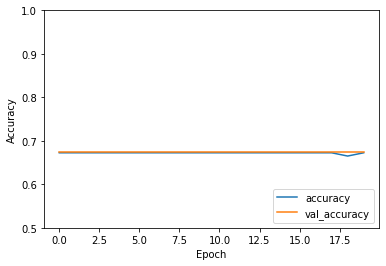

In [ ]:
# define the checkpoint
filepath = "/content/drive/MyDrive/VGG16-wrinkles-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    period=5)

callbacks_list = [checkpoint]



# Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // 32
                   ,callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

2. Secondly we will be training another Deep Neural Network called ResNet50 with already trained weights on ImageNet dataset to predict the hair color of the person in the image (Multi-class classification):

Splitting and Preprocessing of dataset:

In [ ]:
# ensures equal  proportion of the binary class labels in training/testing set
X_train, X_test, y_train, y_test = train_test_split(df_all[['images']], df_all[['hair color']], test_size=0.2, stratify=df_all[['hair color']], random_state=42)

# manually converting it to the shape which will be acceptable to the model
X_train['images'] = X_train['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])
X_test['images'] = X_test['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])

X_train = np.reshape([x for x in X_train['images'].values], (X_train.shape[0], 96,96,3))
X_test = np.reshape([x for x in X_test['images'].values], (X_test.shape[0], 96,96,3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing
X_train, X_test = X_train / 255.0, X_test / 255.0


Data Augmentation and Model creation: 

In [ ]:
# the augmentation is being made part of the model
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)

# Creating a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 9

inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape)(x) # or you can load here any other network


# If you want to freeze the alreadytrained layers then uncomment the below two lines
# for layer in model.layers:
# 	layer.trainable = False     # mark loaded layers as not trainable

# adding new classifier layers for VGG16 
# adding the modification to our model in order to align it with our input size
l1 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(model)
l2 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l1)
l3 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l2)
l4 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(l3)

flat1 = layers.Flatten()(l4)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(9, activation='softmax')(fc2)


# the following two lines are valid if you are using ResNet50 
# flat1 = layers.Flatten()(model)
# output = layers.Dense(9, activation='softmax')(flat1)

# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 512)         0   

Training the model and defining the checkpoint to save the trained model for later use:

Epoch 1/10
50/50 [==============================] - 7s 75ms/step - loss: 26.0317 - accuracy: 0.2200 - val_loss: 1.7892 - val_accuracy: 0.3250
Epoch 2/10
50/50 [==============================] - 4s 71ms/step - loss: 1.7626 - accuracy: 0.2923 - val_loss: 1.7809 - val_accuracy: 0.3250
Epoch 3/10
50/50 [==============================] - 4s 71ms/step - loss: 1.7493 - accuracy: 0.3502 - val_loss: 1.7756 - val_accuracy: 0.3250
Epoch 4/10
50/50 [==============================] - 4s 71ms/step - loss: 1.7519 - accuracy: 0.3356 - val_loss: 1.7755 - val_accuracy: 0.3250
Epoch 5/10
50/50 [==============================] - 4s 71ms/step - loss: 1.7471 - accuracy: 0.3386 - val_loss: 1.7785 - val_accuracy: 0.3250
Epoch 6/10
50/50 [==============================] - 4s 71ms/step - loss: 1.7708 - accuracy: 0.3195 - val_loss: 1.7751 - val_accuracy: 0.3250
Epoch 7/10
50/50 [==============================] - 4s 71ms/step - loss: 1.7438 - accuracy: 0.3216 - val_loss: 1.7739 - val_accuracy: 0.3250
Epoch 8/10
5

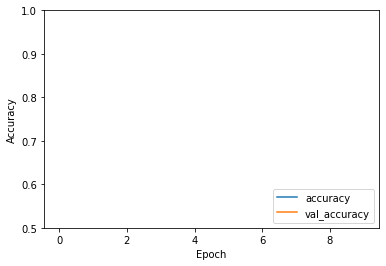

In [ ]:
# define the checkpoint

filepath = "/content/drive/MyDrive/VGG16-hair-color-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    period=10)
callbacks_list = [checkpoint]

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=16,
                    validation_data=(X_test, y_test),steps_per_epoch=len(X_train) // 16
                     ,callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

3. This time we will implement the same DNN used in our first task (modified VGG16) but this time we will clasiify the person in image with GLASSES or with NO GLASSES. 

Splitting and Preprocessing of dataset:

In [ ]:
# ensures equal  proportion of the binary class labels in training/testing set
X_train, X_test, y_train, y_test = train_test_split(df_all[['images']], df_all[['glasses']], test_size=0.2, stratify=df_all[['glasses']], random_state=42)

# manually converting it to the shape which will be acceptable to the model
X_train['images'] = X_train['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])
X_test['images'] = X_test['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])

X_train = np.reshape([x for x in X_train['images'].values], (X_train.shape[0], 96,96,3))
X_test = np.reshape([x for x in X_test['images'].values], (X_test.shape[0], 96,96,3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing
X_train, X_test = X_train / 255.0, X_test / 255.0

Data Augmentation and Model Creation:

In [ ]:
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. 

# Creating a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 3

inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape)(x) # or you can load here any other network
    

# for layer in model.layers:
# 	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers

# adding the modification to our model in order to have better results
l1 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(model)
l2 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l1)
l3 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l2)
l4 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(l3)

# flat1 = layers.Flatten()(model.layers[-1].output)
flat1 = layers.Flatten()(l4)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(3, activation='softmax')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 512)         0   

Training model and defining a checkpoint for model in order to test it later:

Epoch 1/10
25/25 [==============================] - 4s 118ms/step - loss: 0.5758 - accuracy: 0.7550 - val_loss: 0.4259 - val_accuracy: 0.8800
Epoch 2/10
25/25 [==============================] - 3s 107ms/step - loss: 0.4112 - accuracy: 0.8934 - val_loss: 0.4400 - val_accuracy: 0.8800
Epoch 3/10
25/25 [==============================] - 3s 108ms/step - loss: 0.4482 - accuracy: 0.8698 - val_loss: 0.4458 - val_accuracy: 0.8800
Epoch 4/10
25/25 [==============================] - 3s 108ms/step - loss: 0.3945 - accuracy: 0.8947 - val_loss: 0.4281 - val_accuracy: 0.8800
Epoch 5/10
25/25 [==============================] - 3s 108ms/step - loss: 0.4386 - accuracy: 0.8790 - val_loss: 0.4516 - val_accuracy: 0.8800

Epoch 00005: saving model to /content/drive/MyDrive/VGG16-glasses-05-0.8800.h5
Epoch 6/10
25/25 [==============================] - 3s 108ms/step - loss: 0.4068 - accuracy: 0.8956 - val_loss: 0.4340 - val_accuracy: 0.8800
Epoch 7/10
25/25 [==============================] - 3s 108ms/step - 

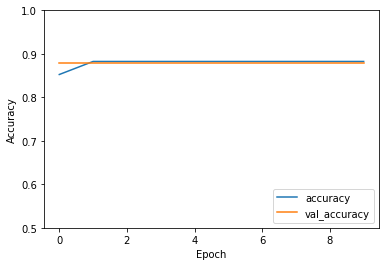

In [ ]:
# define the checkpoint

filepath = "/content/drive/MyDrive/VGG16-glasses-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    period=5)

callbacks_list = [checkpoint]

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // 32
                   ,callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

4. For the fourth network we will again use the same modified VGG16 model and train it to predict whether the face in images has FREAKLES or NO FREAKLES.

Splitting and Pre-Processing of dataset:

In [ ]:
# ensures equal  proportion of the binary class labels in training/testing set
X_train, X_test, y_train, y_test = train_test_split(df_all[['images']], df_all[['freakles']], test_size=0.2, stratify=df_all[['freakles']], random_state=42)

# manually converting it to the shape which will be acceptable to the model
X_train['images'] = X_train['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])
X_test['images'] = X_test['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])

X_train = np.reshape([x for x in X_train['images'].values], (X_train.shape[0], 96,96,3))
X_test = np.reshape([x for x in X_test['images'].values], (X_test.shape[0], 96,96,3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing
X_train, X_test = X_train / 255.0, X_test / 255.0

Data Augmentation and Model creation:

In [ ]:
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model.

# Creating a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 2

inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape)(x) # or you can load here any other network
    

# for layer in model.layers:
# 	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers

# adding the modification to our model in order to align it with our input size
l1 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(model)
l2 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l1)
l3 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l2)
l4 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(l3)

# flat1 = layers.Flatten()(model.layers[-1].output)
flat1 = layers.Flatten()(l4)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(1, activation='sigmoid')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0   

Training model and defining a checkpoint for model in order to test it later:

Epoch 1/10
25/25 [==============================] - 3s 111ms/step - loss: 0.5946 - accuracy: 0.7300 - val_loss: 0.5838 - val_accuracy: 0.7300
Epoch 2/10
25/25 [==============================] - 3s 110ms/step - loss: 0.5826 - accuracy: 0.7300 - val_loss: 0.6331 - val_accuracy: 0.7300
Epoch 3/10
25/25 [==============================] - 3s 110ms/step - loss: 0.5880 - accuracy: 0.7300 - val_loss: 0.6022 - val_accuracy: 0.7300
Epoch 4/10
25/25 [==============================] - 3s 110ms/step - loss: 0.6020 - accuracy: 0.7300 - val_loss: 0.5858 - val_accuracy: 0.7300
Epoch 5/10
25/25 [==============================] - 3s 111ms/step - loss: 0.5894 - accuracy: 0.7300 - val_loss: 0.5915 - val_accuracy: 0.7300

Epoch 00005: saving model to /content/drive/MyDrive/VGG16-freckles-05-0.7300.h5
Epoch 6/10
25/25 [==============================] - 3s 111ms/step - loss: 0.5859 - accuracy: 0.7300 - val_loss: 0.5870 - val_accuracy: 0.7300
Epoch 7/10
25/25 [==============================] - 3s 111ms/step -

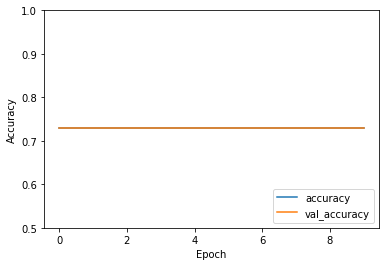

In [ ]:
# define the checkpoint
filepath = "/content/drive/MyDrive/VGG16-freakles-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    period=5)

callbacks_list = [checkpoint]

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // 32
                    ,callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

5. For our last task we will be again using VGG16 with custom modification for our input size. We will be classifying the "hair top" of the people in images. The target variable can have 4 values - 0: bald/shaved, 1: has_few_hair, 2: has_thick_hair, 3: not_visible

Splitting and Pre-Processing the dataset:

In [ ]:
# ensures equal  proportion of the binary class labels in training/testing set
X_train, X_test, y_train, y_test = train_test_split(df_all[['images']], df_all[['hair top']], test_size=0.2, stratify=df_all[['hair top']], random_state=42)

# manually converting it to the shape which will be acceptable to the model
X_train['images'] = X_train['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])
X_test['images'] = X_test['images'].apply(lambda x:x.reshape(1, 96,96,3)[0])

X_train = np.reshape([x for x in X_train['images'].values], (X_train.shape[0], 96,96,3))
X_test = np.reshape([x for x in X_test['images'].values], (X_test.shape[0], 96,96,3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing
X_train, X_test = X_train / 255.0, X_test / 255.0

Data Augmentation and Model creation:

In [ ]:
# the augmentation is being made part of the model
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)

# Creating a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 4

inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape)(x) # or you can load here any other network
    

# for layer in model.layers:
# 	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers

# adding the modification to our model in order to have better results
l1 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(model)
l2 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l1)
l3 = layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(l2)
l4 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(l3)

# flat1 = layers.Flatten()(model.layers[-1].output)
flat1 = layers.Flatten()(l4)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(4, activation='softmax')(flat1)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 512)         0   

Training the model and defining checkpoint:

Epoch 1/15
25/25 [==============================] - 4s 115ms/step - loss: 1.1190 - accuracy: 0.5572 - val_loss: 1.0530 - val_accuracy: 0.6000
Epoch 2/15
25/25 [==============================] - 3s 105ms/step - loss: 1.0560 - accuracy: 0.5974 - val_loss: 1.0477 - val_accuracy: 0.6000
Epoch 3/15
25/25 [==============================] - 3s 105ms/step - loss: 1.0509 - accuracy: 0.6089 - val_loss: 1.0311 - val_accuracy: 0.6000
Epoch 4/15
25/25 [==============================] - 3s 105ms/step - loss: 1.0028 - accuracy: 0.6337 - val_loss: 1.0697 - val_accuracy: 0.6000
Epoch 5/15
25/25 [==============================] - 3s 105ms/step - loss: 1.0512 - accuracy: 0.6099 - val_loss: 1.0459 - val_accuracy: 0.6000

Epoch 00005: saving model to /content/drive/MyDrive/VGG16-hair-top-05-0.6000.h5
Epoch 6/15
25/25 [==============================] - 3s 107ms/step - loss: 1.0733 - accuracy: 0.5833 - val_loss: 1.0742 - val_accuracy: 0.5550
Epoch 7/15
25/25 [==============================] - 3s 106ms/step -

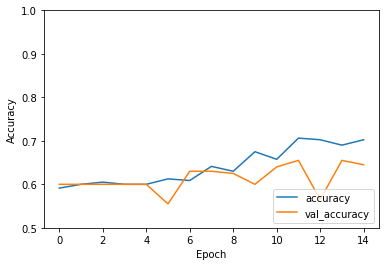

In [ ]:
# define the checkpoint

filepath = "/content/drive/MyDrive/VGG16-hair-top-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    period=5)

callbacks_list = [checkpoint]

# Training
history = model.fit(X_train, y_train, epochs=15, batch_size=32,
                    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // 32
                   ,callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)